**PREDIKSI HARGA SAHAM**

In [ ]:
# Import library dan data yang diinginkan
import yfinance as yf
import pandas as pd

# Menentukan saham dan rentang tanggal
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"

# Mengambil data
stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
# --- `yf.download()` adalah fungsi utama dari pustaka yfinance.
# Fungsi ini menghubungi server Yahoo Finance, mengambil data saham, dan mengembalikannya dalam bentuk DataFrame.
# `stock_data.reset_index(inplace=True)` mengubah kolom 'Date' dari indeks DataFrame menjadi kolom biasa,
# yang akan memudahkan kita untuk menggabungkan data dengan data sentimen berita di langkah berikutnya.

# Tampilkan 5 baris pertama
print(stock_data.head())

C:\Users\HELWA\AppData\Local\Temp\ipykernel_7380\2186517798.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2020-01-02  72.538528  72.598907  71.292319  71.545905  135480400
1      2020-01-03  71.833298  72.594063  71.608692  71.765674  146322800
2      2020-01-06  72.405678  72.444321  70.703012  70.954188  118387200
3      2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000
4      2020-01-08  73.224419  73.526310  71.768094  71.768094  132079200


In [3]:
import pandas as pd

# Daftar nama file JSON yang perlu digabungkan
file_names = [f'data_{year}.json' for year in range(2012, 2023)]

# Buat list kosong untuk menyimpan setiap DataFrame
all_news_data = []

# Loop untuk membaca setiap file JSON dan menambahkannya ke list
for file_name in file_names:
    try:
        df = pd.read_json(file_name)
        all_news_data.append(df)
        print(f"Berhasil memuat file: {file_name}")
    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_name}")

# Gabungkan semua DataFrame dari list menjadi satu DataFrame
if all_news_data:
    combined_news_data = pd.concat(all_news_data, ignore_index=True)
    
    # Tampilkan 5 baris pertama dari DataFrame yang digabungkan
    print("\n5 baris pertama dari data yang digabungkan:")
    print(combined_news_data.head())
    
    # Tampilkan informasi kolom dan jumlah total baris
    print("\nInformasi DataFrame yang digabungkan:")
    print(combined_news_data.info())

else:
    print("\nTidak ada data yang berhasil dimuat.")

Berhasil memuat file: data_2012.json
Berhasil memuat file: data_2013.json
Berhasil memuat file: data_2014.json
Berhasil memuat file: data_2015.json
Berhasil memuat file: data_2016.json
Berhasil memuat file: data_2017.json
Berhasil memuat file: data_2018.json
Berhasil memuat file: data_2019.json
Berhasil memuat file: data_2020.json
Berhasil memuat file: data_2021.json
Berhasil memuat file: data_2022.json

5 baris pertama dari data yang digabungkan:
        category                                           headline  \
0       WELLNESS  I Lost Weight: Janaye Murphy Learned From Her ...   
1      PARENTING                 Top 10 Resolutions Anyone Can Keep   
2       WELLNESS          A Month-To-Month Guide For Your Allergies   
3  HOME & LIVING     Twelve Resolutions for a Clutter-Free New Year   
4       WELLNESS  New Year's Resolutions, Enlightenment, and the...   

                                             authors  \
0                                                      
1  Jenny 

In [8]:
# Lakukan perataan (flatten) kolom secara eksplisit
stock_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Membuat kolom 'Target' yaitu 1 jika harga Close naik dan 0 jika turun
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

# Menghapus baris terakhir karena nilai targetnya kosong
stock_data = stock_data[:-1]

# Menampilkan 5 baris pertama dengan kolom baru
print('\nData Saham setelah diproses: ')
print(stock_data.head())


Data Saham setelah diproses: 
        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2020-01-02  72.538528  72.598907  71.292319  71.545905  135480400       0   
1 2020-01-03  71.833298  72.594063  71.608692  71.765674  146322800       1   
2 2020-01-06  72.405678  72.444321  70.703012  70.954188  118387200       0   
3 2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000       1   
4 2020-01-08  73.224419  73.526310  71.768094  71.768094  132079200       1   

   Target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [5]:
# Menggunakan nltk dengan alat VADER untuk menganalisis sentimen dari judul berita
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HELWA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# Inisialisasi analyzer
analyzer = SentimentIntensityAnalyzer()

# Mengubah format kolom tanggal menjadi datetime
combined_news_data['date'] = pd.to_datetime(combined_news_data['date'])

# Membuat kolom 'sentimen_score' dari judul berita
combined_news_data['sentiment_score'] = combined_news_data['headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Periksa 5 baris pertama data sentimen dengan skor baru
print("\nData Berita dengan skor sentimen:")
print(combined_news_data.head())


Data Berita dengan skor sentimen:
        category                                           headline  \
0       WELLNESS  I Lost Weight: Janaye Murphy Learned From Her ...   
1      PARENTING                 Top 10 Resolutions Anyone Can Keep   
2       WELLNESS          A Month-To-Month Guide For Your Allergies   
3  HOME & LIVING     Twelve Resolutions for a Clutter-Free New Year   
4       WELLNESS  New Year's Resolutions, Enlightenment, and the...   

                                             authors  \
0                                                      
1  Jenny Isenman, Contributor\nJenny From the Blo...   
2                                                      
3                  Francine Jay, Contributor\nAuthor   
4       Bob Lingvall, Contributor\nSpiritual Teacher   

                                                link  \
0  https://www.huffingtonpost.com/entry/i-lost-we...   
1  https://www.huffingtonpost.com/entry/new-years...   
2  https://www.huffingtonpost.com

In [10]:
# Agregasi skor sentimen harian (rata-rata)
daily_sentiment = combined_news_data.groupby('date')['sentiment_score'].mean().reset_index()
daily_sentiment.columns = ['Date', 'daily_sentiment_score']

# Gabungkan data saham dan data sentimen
# Gunakan 'left' join agar semua tanggal saham tetap ada
merged_data = pd.merge(stock_data, daily_sentiment, on='Date', how='left')

# Isi nilai sentimen yang hilang (NaN) dengan 0
# Ini untuk hari di mana tidak ada berita yang relevan
merged_data['daily_sentiment_score'].fillna(0, inplace=True)

# Tambahkan fitur teknikal (Moving Average) dari harga penutupan
merged_data['SMA_5'] = merged_data['Close'].rolling(window=5).mean().shift(1)
merged_data['SMA_10'] = merged_data['Close'].rolling(window=10).mean().shift(1)

# Hapus baris-baris yang memiliki nilai NaN akibat moving average
merged_data.dropna(inplace=True)

print("\nData Gabungan dengan Fitur Tambahan:")
print(merged_data.head())


Data Gabungan dengan Fitur Tambahan:
         Date       Open       High        Low      Close  Adj Close  Volume  \
10 2020-01-16  76.134636  76.245737  75.373871  75.736141  108829200       1   
11 2020-01-17  76.977524  76.979934  76.076677  76.383396  137816400       0   
12 2020-01-21  76.455856  77.047559  76.318192  76.605593  110843200       1   
13 2020-01-22  76.728775  77.281835  76.634581  76.941301  101832400       1   
14 2020-01-23  77.098289  77.177986  76.233668  76.781908  104472000       0   

    Target  daily_sentiment_score      SMA_5     SMA_10  
10       1              -0.095060  75.256985  73.473412  
11       1              -0.357020  75.563705  73.892436  
12       1               0.015440  75.837580  74.354208  
13       0              -0.322760  76.105660  74.919349  
14       1               0.150325  76.196472  75.371945  


C:\Users\HELWA\AppData\Local\Temp\ipykernel_7380\2491810800.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['daily_sentiment_score'].fillna(0, inplace=True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Menentukan fitur (X) dan target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'daily_sentiment_score', 'SMA_5', 'SMA_10']
X = merged_data[features]
y = merged_data['Target']

# Membagi data menjadi dua bagian yaitu 80% set training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi pada data set
predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("\nHasil Evaluasi Model: ")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Hasil Evaluasi Model: 
Accuracy: 0.64
Precision: 0.63
Recall: 0.71
F1-Score: 0.67


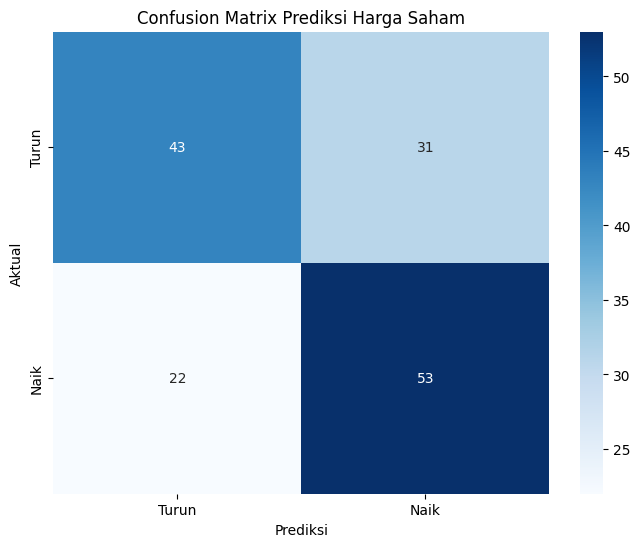


Interpretasi Confusion Matrix:
Pada sumbu Y (Aktual): 
- Baris turun menunjukkan hari di mana harga saham sedang menurun
- Baris naik menunjukkan hari di mana harga saham sedang meningkat
Pada sumbu X (Prediksi): 
- Kolom turun menunjukkan hari di mana model memprediksi harga saham akan menurun
- Kolom naik menunjukkan hari di mana model memprediksi harga saham akan meningkat


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions)

# Membuat visualisasi menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Turun', 'Naik'], yticklabels=['Turun', 'Naik'])
plt.title('Confusion Matrix Prediksi Harga Saham')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.savefig('confusion_matrix.png')
plt.show()

# Berikan interpretasi dari hasil matriks
print('\nInterpretasi Confusion Matrix:')
print('Pada sumbu Y (Aktual): ')
print('- Baris turun menunjukkan hari di mana harga saham sedang menurun')
print('- Baris naik menunjukkan hari di mana harga saham sedang meningkat')
print('Pada sumbu X (Prediksi): ')
print('- Kolom turun menunjukkan hari di mana model memprediksi harga saham akan menurun')
print('- Kolom naik menunjukkan hari di mana model memprediksi harga saham akan meningkat')

**PEMODELAN DENGAN XGBOOST**

Pemodelan ini untuk membandingkan dengan algoritma RandomForestClassifier

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

# Menentukan fitur (X) dan (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'daily_sentiment_score', 'SMA_5', 'SMA_10']
X = merged_data[features]
y = merged_data['Target']

# Membagi data menjadi 2 bagian yaitu 80% set training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Inisialisasi dan melatih model XGBoost
# Menggunakan XGBClassifier untuk menangani masalah klasifikasi
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Membuat prediksi pada data test
xgb_predictions = xgb_model.predict(X_test)


In [18]:
# Mengevaluasi mode XGBoost
# Menghitung matriks evaluasi

accuracy = accuracy_score(y_test, xgb_predictions)
precision = precision_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)

print('\nHasil Evaluasi Model XGBoost')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Hasil Evaluasi Model XGBoost
Accuracy: 0.65
Precision: 0.63
Recall: 0.76
F1-Score: 0.69


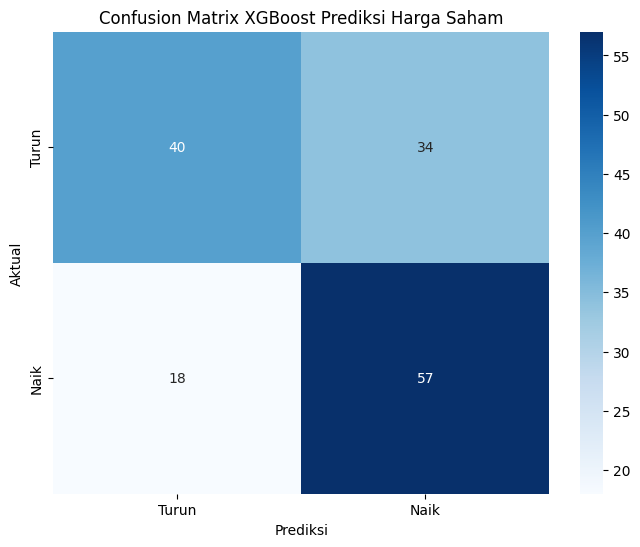

In [19]:
# Visualisasi Hasil
cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Turun', 'Naik'], yticklabels=['Turun', 'Naik'])
plt.title('Confusion Matrix XGBoost Prediksi Harga Saham')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.savefig('confusion_matrix_xgboost.png')
plt.show()

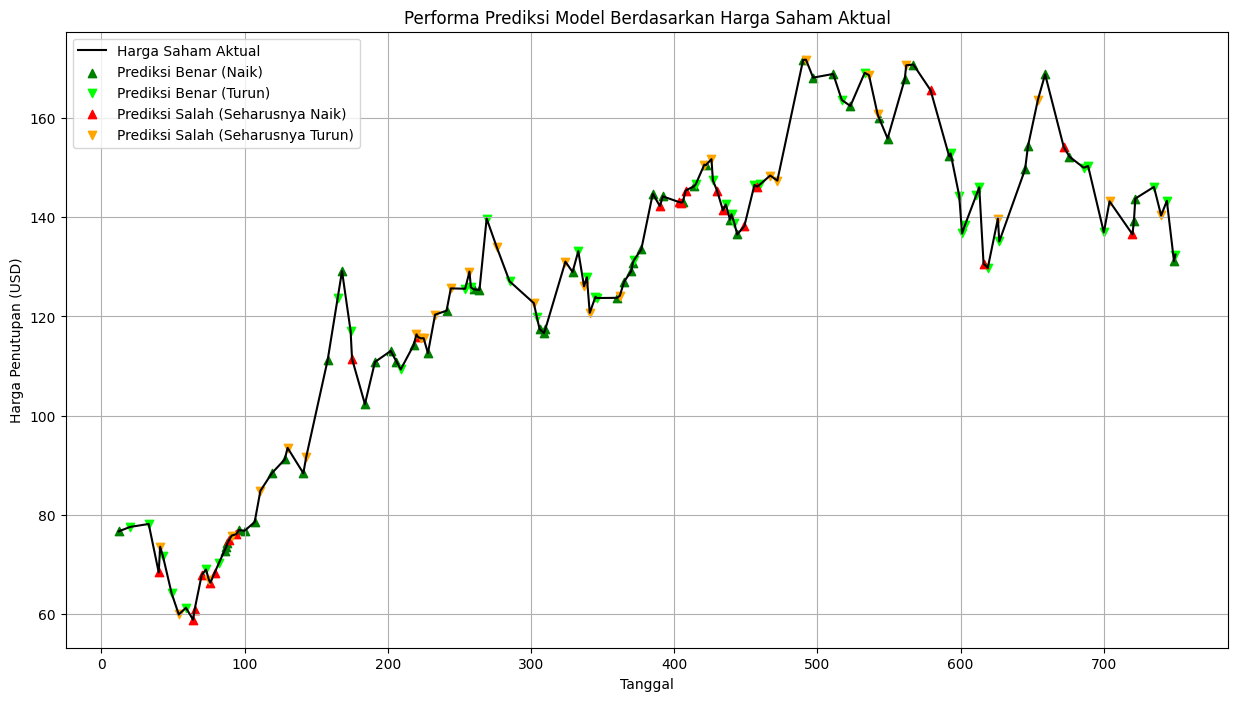

In [20]:
import matplotlib.pyplot as plt

# Pastikan Anda sudah memiliki variabel X_test, y_test, dan predictions
# serta DataFrame `merged_data` yang digunakan untuk model

# Tambahkan kolom prediksi ke dalam DataFrame X_test untuk analisis
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual'] = y_test
X_test_with_predictions['Prediction'] = predictions

# Ambil data harga penutupan aktual dan prediksi
actual_prices = merged_data.loc[y_test.index, 'Close']
prediction_results = X_test_with_predictions[['Actual', 'Prediction']]

# Gabungkan data aktual dan prediksi menjadi satu DataFrame untuk memudahkan plotting
plot_df = pd.DataFrame({
    'Actual_Price': actual_prices,
    'Actual_Movement': prediction_results['Actual'],
    'Predicted_Movement': prediction_results['Prediction']
}).sort_index()

# Tentukan prediksi yang benar dan salah
plot_df['Correct_Prediction'] = plot_df['Actual_Movement'] == plot_df['Predicted_Movement']

# Buat grafik
plt.figure(figsize=(15, 8))
plt.plot(plot_df.index, plot_df['Actual_Price'], label='Harga Saham Aktual', color='black')

# Plot titik prediksi yang benar dan salah
correct_up = plot_df[(plot_df['Actual_Movement'] == 1) & (plot_df['Correct_Prediction'])]
correct_down = plot_df[(plot_df['Actual_Movement'] == 0) & (plot_df['Correct_Prediction'])]
incorrect_up = plot_df[(plot_df['Actual_Movement'] == 1) & (~plot_df['Correct_Prediction'])]
incorrect_down = plot_df[(plot_df['Actual_Movement'] == 0) & (~plot_df['Correct_Prediction'])]

plt.scatter(correct_up.index, correct_up['Actual_Price'], color='green', marker='^', label='Prediksi Benar (Naik)')
plt.scatter(correct_down.index, correct_down['Actual_Price'], color='lime', marker='v', label='Prediksi Benar (Turun)')
plt.scatter(incorrect_up.index, incorrect_up['Actual_Price'], color='red', marker='^', label='Prediksi Salah (Seharusnya Naik)')
plt.scatter(incorrect_down.index, incorrect_down['Actual_Price'], color='orange', marker='v', label='Prediksi Salah (Seharusnya Turun)')

plt.title('Performa Prediksi Model Berdasarkan Harga Saham Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.grid(True)
plt.savefig('predicted_vs_actual_price.png')
plt.show()